In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
%matplotlib inline
%matplotlib notebook

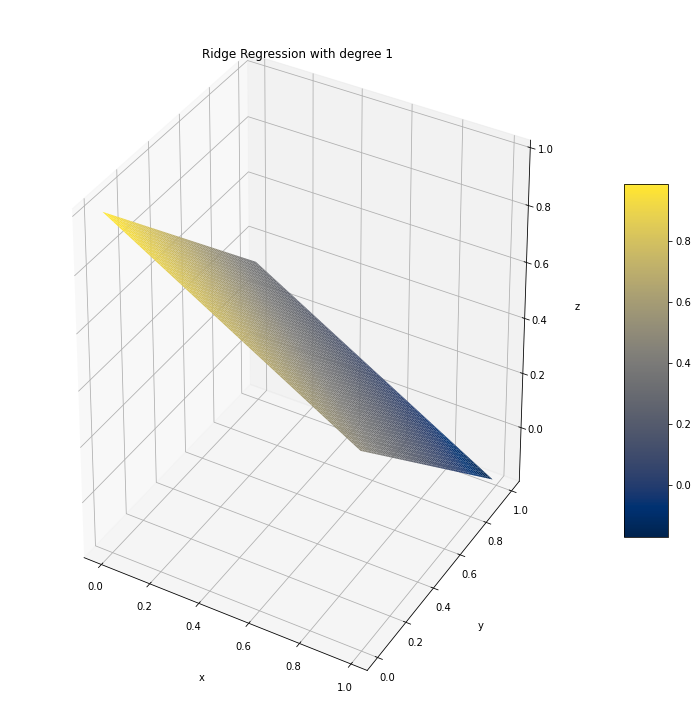

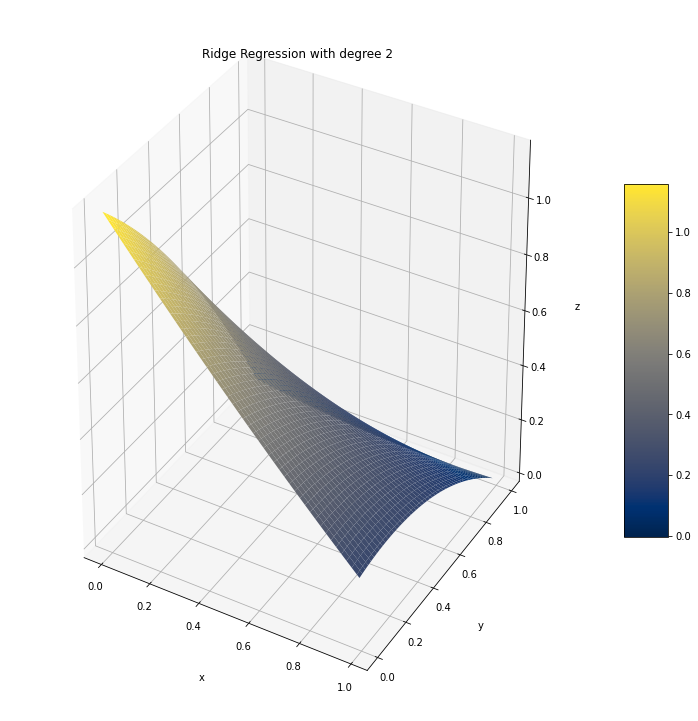

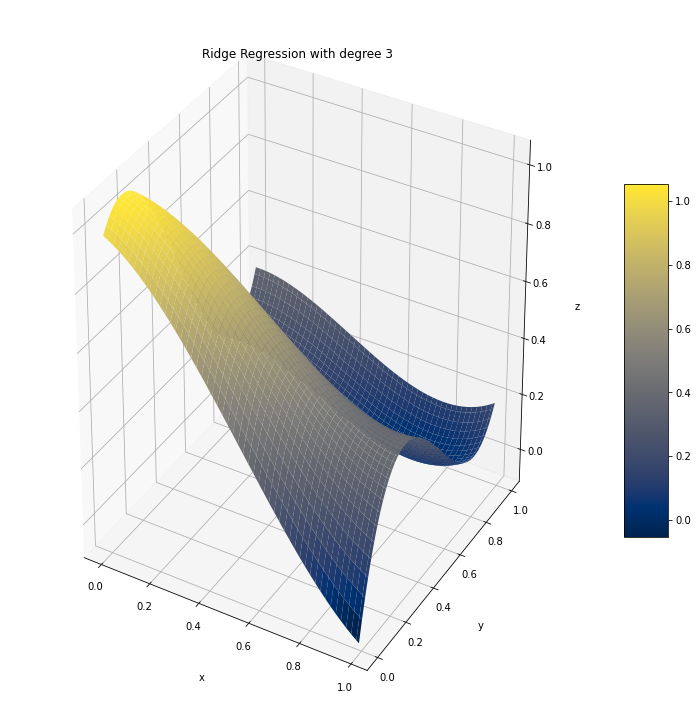

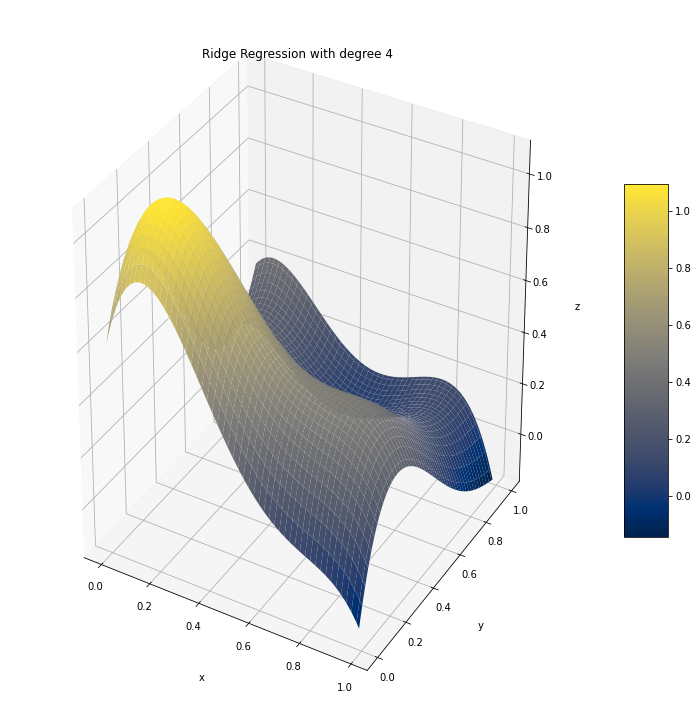

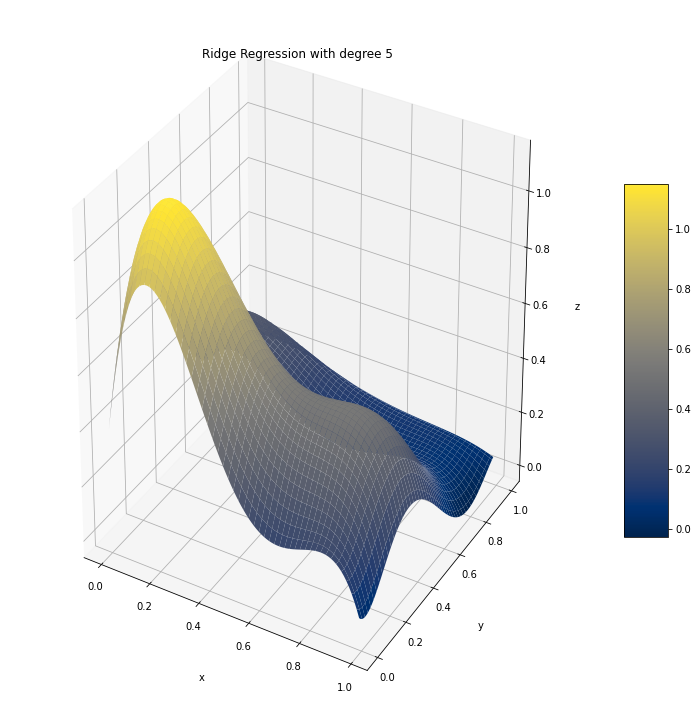

In [2]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def R2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)

def MSE(y, y_hat):
    return np.mean(np.square(y - y_hat))

def z_score(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)


def Ridge(x_train, y_train, Lambda = 0.000001):
  beta = np.linalg.pinv(x_train.T @ x_train + Lambda*np.identity(x_train.shape[1]) ) @ x_train.T @ y_train
  return beta

# Create data
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)

x, y = np.meshgrid(x,y)


# Create features as pairs of (x, y)
features = np.stack([x.ravel(), y.ravel()], axis=1)

# Compute z
z = FrankeFunction(x, y)

# Get labels
labels = z.ravel()


# Scaling data
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

# Split dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20)

# Create the matrix of features
degree = [1, 2, 3, 4, 5]


for d in degree:
  poly = PolynomialFeatures(d)
  x_train_poly = poly.fit_transform(x_train)
  x_test_poly = poly.transform(x_test)

  # Determine optimal parameters with ridge regression
  beta = Ridge(x_train_poly, y_train, Lambda =0.000001)

  fig = plt.figure(figsize=(13, 13))
  ax = plt.axes(projection='3d')

  Y_hat = poly.fit_transform(features) @ beta

  surf = ax.plot_surface(x, y, Y_hat.reshape(x.shape), cmap = plt.cm.cividis)
  fig.colorbar(surf, shrink=0.5, aspect=8)
  ax.set_title('Ridge Regression with degree '+ str(d))
  ax.set_xlabel('x', labelpad=20)
  ax.set_ylabel('y', labelpad=20)
  ax.set_zlabel('z', labelpad=20)

  plt.show()
